In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [206]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r'C:\Users\Avinash\Desktop\FRProject\project1\customerretention.csv')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the �Bag�, �Shopping Cart�?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers� information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

In [207]:
df.shape

(269, 71)

In [208]:
pd.options.display.min_rows = 71
print(df.isnull().sum())

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

In [209]:
df.nunique()

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
3 Which city do you shop online from?                                                                                                                                                                                  11
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                      

In [210]:
df["Which of the Indian online retailer would you recommend to a friend?"].nunique()

8

# Encodeing

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
objList = df.select_dtypes(include = "object").columns

In [213]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype
---  ------                                                                                                                                                                                                          --------------  -----
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64
 1   2 How old are you?                                                                                                                                                                       

In [214]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the �Bag�, �Shopping Cart�?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers� information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

# Changing the name of columns to our liking

In [215]:
heading=list(df.columns.values)

In [216]:
new_names=['Gender', 'Age','City','PinCode','TimeOfOnlineShoping','PurchaseInAYear','TypeOfInternet','Device','ScreenSize','OS','Browser','Channel','AccessType','TimeBeforeBuying','PaymentOption','AbandonShopingcart','ReasonForAbandonCart','ContentMustBeEasyOrNot','InfoOnSimilarProd','InfoOfListedSellerAndProd','InfoMustBeClear','EaseInNavigatingWebsite','LoadingSpeed','UserFriendlyUI','EasyPaymentOptions','TransactoinTimeAtRetailPart','GoodCustomerCare','PrivacyOfCustomer','ResponseInDifferentModes','Discounts','EnjoymentFromOnlineShopping','ConvinientAndFlexible','ReplacementPolicy','AccessToLoyalty','DisplayQualityInfo','GoodQualityWebsite','NetBenifitOfOnlineShoping','Trust','WideVarietyProducts','CompleteAndRelevantInfo','MonetarySavings','PatronizingOnlineRetailer','SenceOfAdventure','EnhancingSocialStatus','FeelGratification','FulfilCertianRoles','ValueForMoney','ShopedFrom','WebsiteOrApp','AppealingWebpageLayout','VarietyOfProductOnOffer','RelevantDescriptionOfProduct','Loading_Speed','ReliabilityOfWebsite','CompleatingPurchaseSpeed','MultiplePaymentOptions','SpeedyDelevery','Privacy_Of_Customer','SecurityOfCustomerFinantialInfo','Trustworthiness','online assistance','LoginSpeed','ProductDisplayingSpeed','LatePriceDeclaration','PageLoadingSpeed','LimitedPaymentModeMajority','LongDelivery','ChangeInUI','DisruptionInNavigation','EfficientAsBefore','RecomecdToAFriend']

In [217]:
res = {heading[i]: new_names[i] for i in range(len(heading))}

In [218]:
df = df.rename(columns = res, inplace = False)

In [219]:
df.head()

,Gender,Age,City,PinCode,TimeOfOnlineShoping,PurchaseInAYear,TypeOfInternet,Device,ScreenSize,OS,Browser,Channel,AccessType,TimeBeforeBuying,PaymentOption,AbandonShopingcart,ReasonForAbandonCart,ContentMustBeEasyOrNot,InfoOnSimilarProd,InfoOfListedSellerAndProd,InfoMustBeClear,EaseInNavigatingWebsite,LoadingSpeed,UserFriendlyUI,EasyPaymentOptions,TransactoinTimeAtRetailPart,GoodCustomerCare,PrivacyOfCustomer,ResponseInDifferentModes,Discounts,EnjoymentFromOnlineShopping,ConvinientAndFlexible,ReplacementPolicy,AccessToLoyalty,DisplayQualityInfo,GoodQualityWebsite,NetBenifitOfOnlineShoping,Trust,WideVarietyProducts,CompleteAndRelevantInfo,MonetarySavings,PatronizingOnlineRetailer,SenceOfAdventure,EnhancingSocialStatus,FeelGratification,FulfilCertianRoles,ValueForMoney,ShopedFrom,WebsiteOrApp,AppealingWebpageLayout,VarietyOfProductOnOffer,RelevantDescriptionOfProduct,Loading_Speed,ReliabilityOfWebsite,CompleatingPurchaseSpeed,MultiplePaymentOptions,SpeedyDelevery,Privacy_Of_Customer,SecurityOfCustomerFinantialInfo,Trustworthiness,online assistance,LoginSpeed,ProductDisplayingSpeed,LatePriceDeclaration,PageLoadingSpeed,LimitedPaymentModeMajority,LongDelivery,ChangeInUI,DisruptionInNavigation,EfficientAsBefore,RecomecdToAFriend
0,0,3,2,110009,5,4,4,3,5,1,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,7,9,7,5,10,9,9,8,9,0,0,0,7,9,0,0,3,5,0,3,2,0,0,6
1,1,2,2,110030,5,5,2,1,2,3,1,1,4,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,1,2,4,201308,4,5,3,1,4,2,1,1,4,4,4,3,5,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,4,3,3,4,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,0,2,6,132001,4,1,3,1,4,3,2,1,1,3,1,1,2,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,4,5,4,3,4,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,1,2,0,530068,3,2,2,1,2,3,2,3,4,5,1,4,2,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,4,3,1,5,1,5,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3


# Removing Outliers

In [220]:
from scipy.stats import zscore

In [221]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [222]:
df.shape

(215, 71)

# Seperating The Columns Into Three Datasets With RecomendToAFriend In all of them as it is our Target Column

This Will Help us to see the graphs a little better because of the sheer number of columns in this dataset

In [223]:
target=df["RecomecdToAFriend"]
list(target)

[3,
 5,
 1,
 3,
 4,
 7,
 0,
 6,
 0,
 1,
 2,
 5,
 1,
 3,
 4,
 7,
 1,
 3,
 0,
 6,
 0,
 1,
 2,
 5,
 1,
 3,
 3,
 5,
 1,
 3,
 4,
 7,
 0,
 6,
 0,
 1,
 2,
 3,
 5,
 1,
 1,
 3,
 4,
 7,
 0,
 6,
 0,
 1,
 2,
 3,
 5,
 1,
 1,
 3,
 5,
 1,
 6,
 1,
 2,
 0,
 0,
 3,
 5,
 3,
 4,
 0,
 1,
 0,
 6,
 0,
 1,
 7,
 6,
 1,
 6,
 1,
 5,
 3,
 4,
 0,
 6,
 1,
 2,
 0,
 1,
 0,
 6,
 0,
 1,
 7,
 0,
 3,
 5,
 3,
 4,
 0,
 6,
 1,
 2,
 0,
 1,
 0,
 6,
 0,
 1,
 7,
 0,
 0,
 4,
 0,
 5,
 1,
 7,
 1,
 3,
 6,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 6,
 6,
 3,
 6,
 1,
 5,
 1,
 5,
 1,
 1,
 5,
 1,
 6,
 6,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 6,
 5,
 1,
 1,
 1,
 7,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 6,
 6,
 0,
 0,
 0,
 1,
 5,
 1,
 5,
 1,
 1,
 5,
 1,
 5,
 1,
 1,
 1,
 7,
 1,
 3,
 6,
 6,
 3,
 6,
 6,
 1,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 0,
 1,
 7,
 2,
 0,
 1,
 6,
 3,
 4,
 5,
 3,
 6,
 0,
 0,
 0]

# Personal Data Frame

In [224]:
PersonalDF=new_names[0:17]

pdf=df[PersonalDF].copy()

pdf["RecomecdToAFriend"]=target

pdf.head()

,Gender,Age,City,PinCode,TimeOfOnlineShoping,PurchaseInAYear,TypeOfInternet,Device,ScreenSize,OS,Browser,Channel,AccessType,TimeBeforeBuying,PaymentOption,AbandonShopingcart,ReasonForAbandonCart,RecomecdToAFriend
1,1,2,2,110030,5,5,2,1,2,3,1,1,4,5,1,5,5,3
2,1,2,4,201308,4,5,3,1,4,2,1,1,4,4,4,3,5,5
3,0,2,6,132001,4,1,3,1,4,3,2,1,1,3,1,1,2,1
4,1,2,0,530068,3,2,2,1,2,3,2,3,4,5,1,4,2,3
5,1,3,9,201308,5,5,2,1,4,2,1,1,4,5,4,4,2,4


# AgreeOrDisagree

In [225]:
PersonalDF=new_names[17:47]

aod=df[PersonalDF].copy()

aod["RecomecdToAFriend"]=target

aod.head()

,ContentMustBeEasyOrNot,InfoOnSimilarProd,InfoOfListedSellerAndProd,InfoMustBeClear,EaseInNavigatingWebsite,LoadingSpeed,UserFriendlyUI,EasyPaymentOptions,TransactoinTimeAtRetailPart,GoodCustomerCare,PrivacyOfCustomer,ResponseInDifferentModes,Discounts,EnjoymentFromOnlineShopping,ConvinientAndFlexible,ReplacementPolicy,AccessToLoyalty,DisplayQualityInfo,GoodQualityWebsite,NetBenifitOfOnlineShoping,Trust,WideVarietyProducts,CompleteAndRelevantInfo,MonetarySavings,PatronizingOnlineRetailer,SenceOfAdventure,EnhancingSocialStatus,FeelGratification,FulfilCertianRoles,ValueForMoney,RecomecdToAFriend
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,3
2,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,4,3,3,4,5
3,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,4,5,4,3,4,1
4,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,4,3,1,5,1,5,3
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,4,5,4


# Which Shoping Websites

In [226]:
PersonalDF=new_names[47:]

wsw=df[PersonalDF].copy()

wsw.head()

,ShopedFrom,WebsiteOrApp,AppealingWebpageLayout,VarietyOfProductOnOffer,RelevantDescriptionOfProduct,Loading_Speed,ReliabilityOfWebsite,CompleatingPurchaseSpeed,MultiplePaymentOptions,SpeedyDelevery,Privacy_Of_Customer,SecurityOfCustomerFinantialInfo,Trustworthiness,online assistance,LoginSpeed,ProductDisplayingSpeed,LatePriceDeclaration,PageLoadingSpeed,LimitedPaymentModeMajority,LongDelivery,ChangeInUI,DisruptionInNavigation,EfficientAsBefore,RecomecdToAFriend
1,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3
5,4,4,1,3,4,7,4,8,4,0,5,4,4,4,6,3,2,2,2,1,5,2,0,4


# 1:Personal Dataframe Analysis

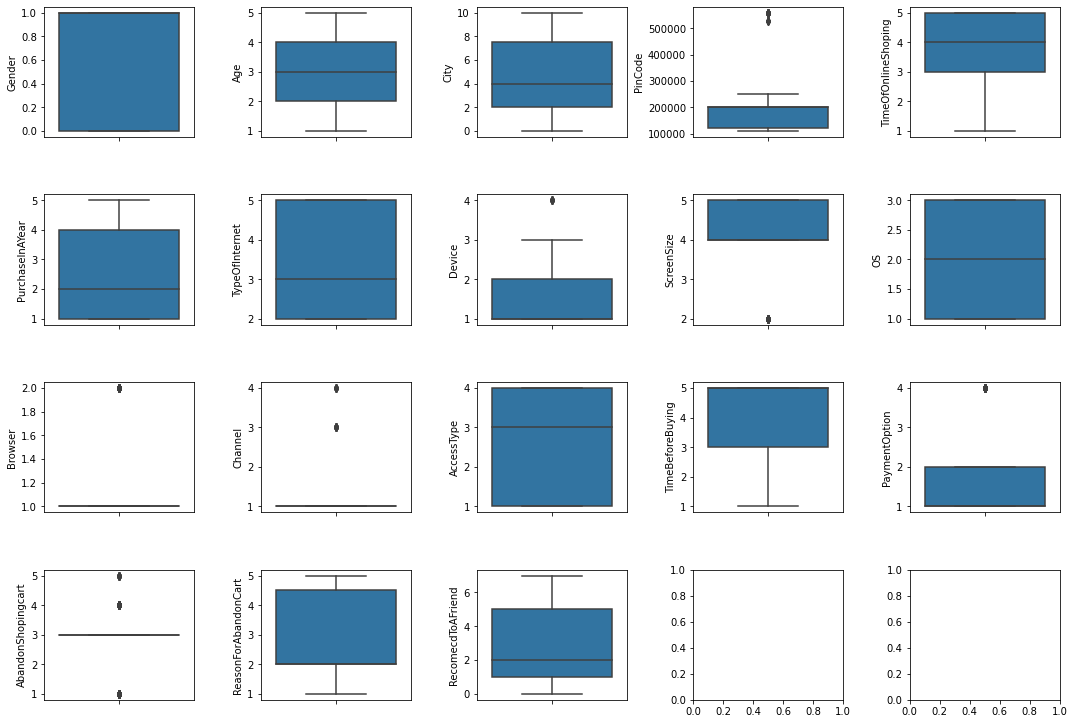

In [166]:
fig,ax=plt.subplots(ncols=5,nrows=4,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in pdf.items():
        sn.boxplot(y=col,data=pdf,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

There are few outliers but not much

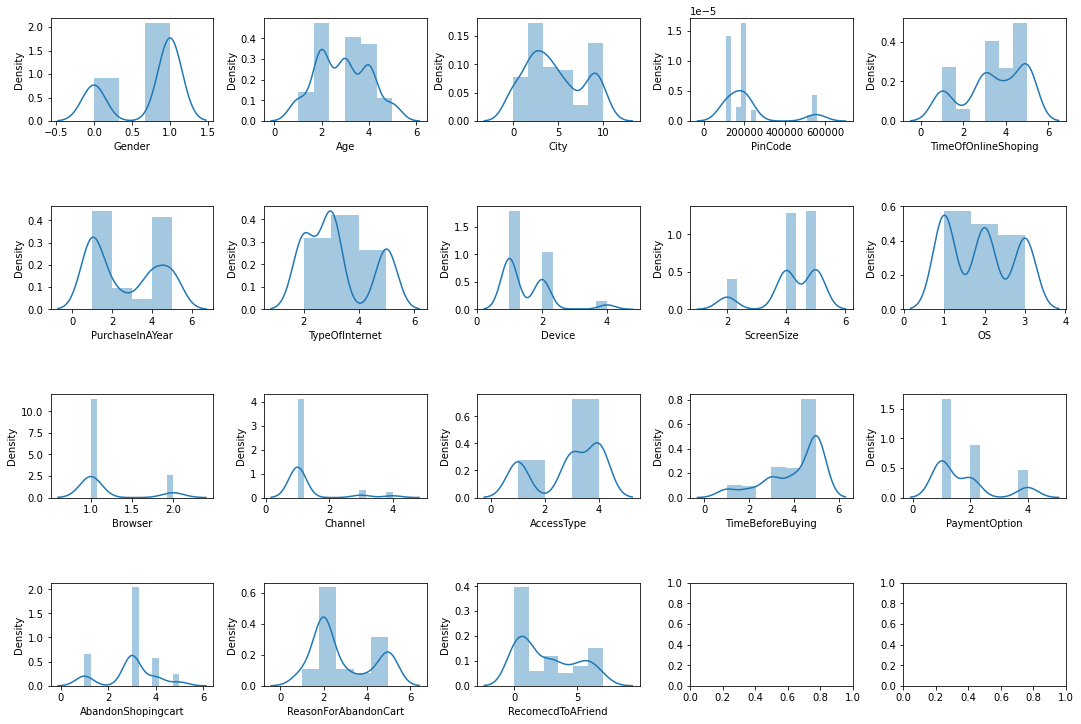

In [167]:
fig,ax=plt.subplots(ncols=5,nrows=4,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in pdf.items():
        sn.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:>

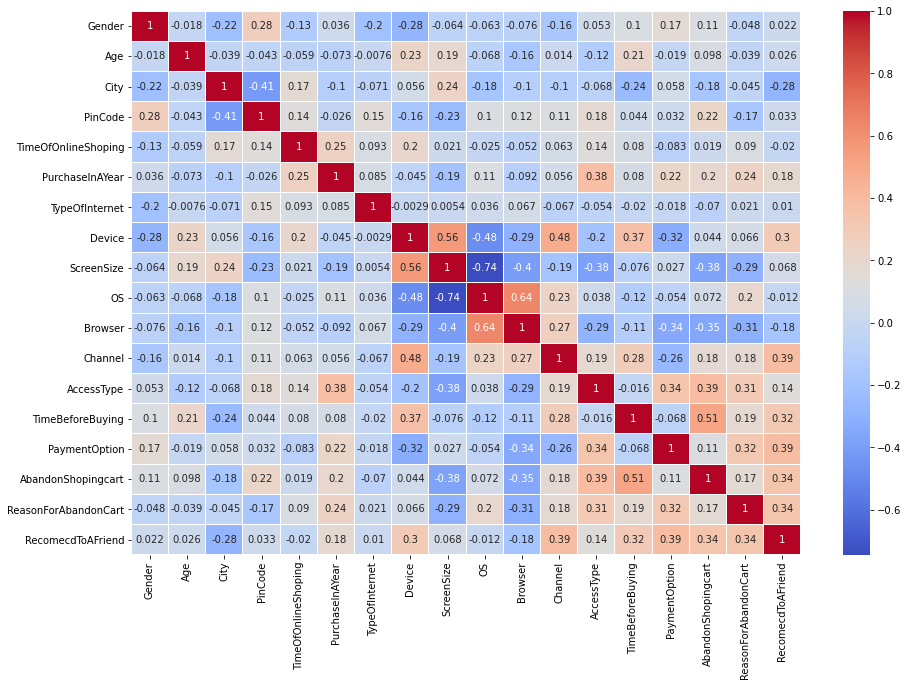

In [168]:
plt.figure(figsize=(15,10))
sn.heatmap(pdf.corr(),linewidths=.1,cmap="coolwarm", annot=True)

Device,TimeBeforeBuying,PaymentOption,AbandonShopingCart,ReasonForAbandoningCart are highly corellated to each other so we drop the other columns and focus on these columns only

In [169]:
pdf.head()

,Gender,Age,City,PinCode,TimeOfOnlineShoping,PurchaseInAYear,TypeOfInternet,Device,ScreenSize,OS,Browser,Channel,AccessType,TimeBeforeBuying,PaymentOption,AbandonShopingcart,ReasonForAbandonCart,RecomecdToAFriend
1,1,2,2,110030,5,5,2,1,2,3,1,1,4,5,1,5,5,3
2,1,2,4,201308,4,5,3,1,4,2,1,1,4,4,4,3,5,5
3,0,2,6,132001,4,1,3,1,4,3,2,1,1,3,1,1,2,1
4,1,2,0,530068,3,2,2,1,2,3,2,3,4,5,1,4,2,3
5,1,3,9,201308,5,5,2,1,4,2,1,1,4,5,4,4,2,4


In [170]:
pdf=pdf[['Device','TimeBeforeBuying','PaymentOption','AbandonShopingcart','ReasonForAbandonCart','RecomecdToAFriend']]

In [171]:
pdf.head()

,Device,TimeBeforeBuying,PaymentOption,AbandonShopingcart,ReasonForAbandonCart,RecomecdToAFriend
1,1,5,1,5,5,3
2,1,4,4,3,5,5
3,1,3,1,1,2,1
4,1,5,1,4,2,3
5,1,5,4,4,2,4


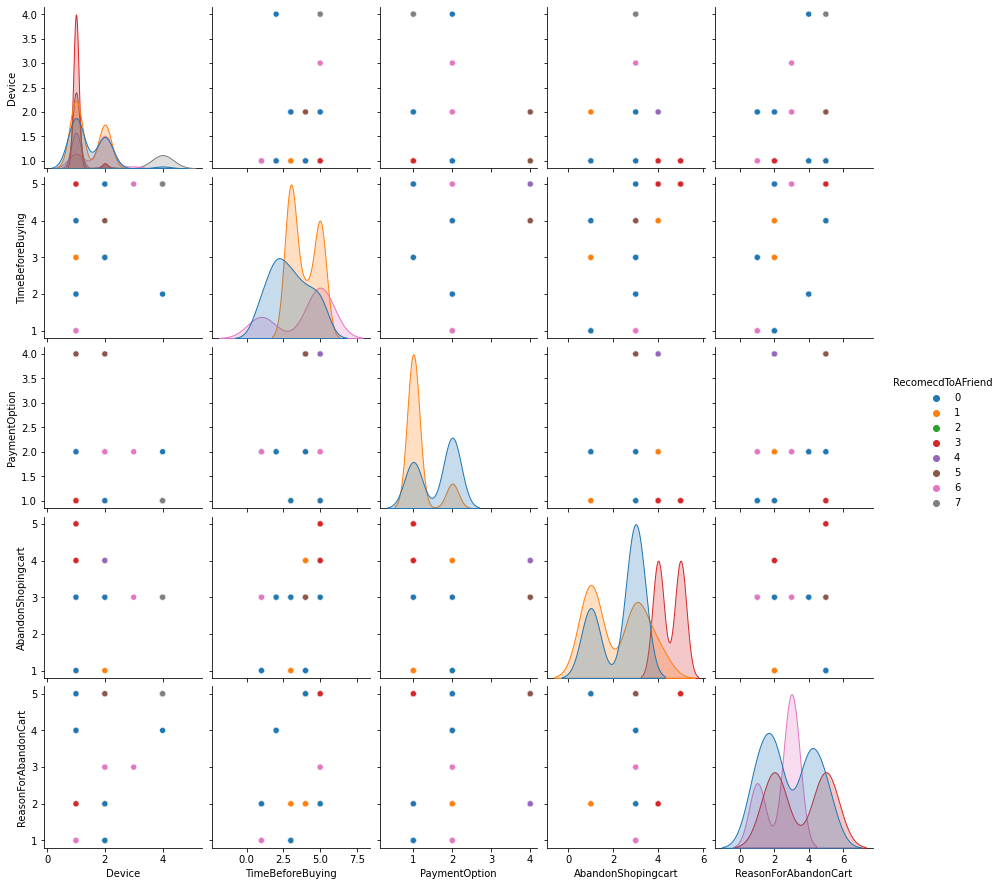

In [172]:
sn.pairplot(pdf,hue="RecomecdToAFriend",palette='tab10')

# Skewness

In [173]:
pdf.skew()

Device                  1.807437
TimeBeforeBuying       -1.090214
PaymentOption           1.304269
AbandonShopingcart     -0.407826
ReasonForAbandonCart    0.580884
RecomecdToAFriend       0.469446
dtype: float64

In [174]:
from scipy.stats import boxcox

## Device

In [175]:
d=boxcox(pdf["Device"])[0]
pd.Series(d).skew()

0.44813699495575043

In [176]:
pdf["Device"]=d

## TimeBeforeBuying

In [177]:
t=boxcox(pdf["TimeBeforeBuying"])[0]
pd.Series(t).skew()

-0.5964449100977356

In [178]:
pdf["TimeBeforeBuying"]=t

## PaymentOption

In [179]:
p=boxcox(pdf["PaymentOption"])[0]
pd.Series(p).skew()

0.3819633251013283

In [180]:
pdf["TimeBeforeBuying"]=p

## ReasonForAbandonCart

In [181]:
r=boxcox(pdf["ReasonForAbandonCart"])[0]
pd.Series(r).skew()

-0.0018685678846147057

In [182]:
pdf["ReasonForAbandonCart"]=r

# 2:Agree or Disagree Dataframe

0:Agree
1:Disagree
2:Strongly Agree
3:Indifferent
4:Strongly Disagree

In [227]:
AODheadings=list(aod.columns.values)

In [228]:
agr=[]
dis=[]
ind=[]

for i in AODheadings:
    agree=0
    disagree=0
    indif=0
    for val in aod[i]:
        if val==4 or val==5:
            agree+=1
        elif val==2 or val==1:
            disagree+=1
        else:
            indif+=1
    agr.append("{:.2f}".format(agree*0.371747212))#taaking percentages of all
    dis.append("{:.2f}".format(disagree*0.371747212))#taaking percentages of all
    ind.append("{:.2f}".format(indif*0.371747212))#taaking percentages of all

In [229]:
new_df = pd.DataFrame()
new_df["Column Names"]=AODheadings
new_df["Agree"]=agr
new_df["Disagree"]=dis
new_df["Indifferent"]=ind


In [230]:
new_df.head()

,Column Names,Agree,Disagree,Indifferent
0,ContentMustBeEasyOrNot,77.32,0.00,2.60
1,InfoOnSimilarProd,70.26,0.00,9.67
2,InfoOfListedSellerAndProd,65.06,0.00,14.87
3,InfoMustBeClear,77.32,2.60,0.00
4,EaseInNavigatingWebsite,79.93,0.00,0.00


##### NOW LETS SEE ALL THE TABLES WHICH HAVE PERCENTAGE OF AGREE OF MORE THAN 75%

In [231]:
highlyagree=[]
for i in new_df["Agree"]:
    a=int(float(i))
    if a > 63:
        highlyagree.append(i)
print(len(highlyagree))

21


there are 21 columns which people agrees on that it should be there for better customer retention.

In [232]:
highlydisagree=[]
for i in new_df["Disagree"]:
    a=int(float(i))
    if a > 27:
        highlydisagree.append(i)
print(len(highlydisagree))

0


All the columns have a disagree rate of less than 27%.

In [234]:
indifr=[]
for i in new_df["Agree"]:
    a=int(float(i))
    if a > 50:
        indifr.append(i)
print(len(indifr))

26


Most of the people have more than 50% no objections on any of the charactersticks of the columns.

### We will move on with the columns which people mostly agreed upon!!!

In [235]:
colname=[]
for i,j in zip(new_df["Agree"],new_df["Column Names"]):
    a=int(float(i))
    if a > 63:
        colname.append(j)

In [236]:
aod=aod[colname]

In [237]:
aod.head()

,ContentMustBeEasyOrNot,InfoOnSimilarProd,InfoOfListedSellerAndProd,InfoMustBeClear,EaseInNavigatingWebsite,LoadingSpeed,UserFriendlyUI,EasyPaymentOptions,TransactoinTimeAtRetailPart,GoodCustomerCare,PrivacyOfCustomer,ResponseInDifferentModes,Discounts,ConvinientAndFlexible,ReplacementPolicy,DisplayQualityInfo,GoodQualityWebsite,Trust,CompleteAndRelevantInfo,MonetarySavings,ValueForMoney
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,4
3,4,4,3,4,5,4,5,5,4,5,5,4,4,3,4,3,4,4,4,5,4
4,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,4,5,5,4,5,5
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


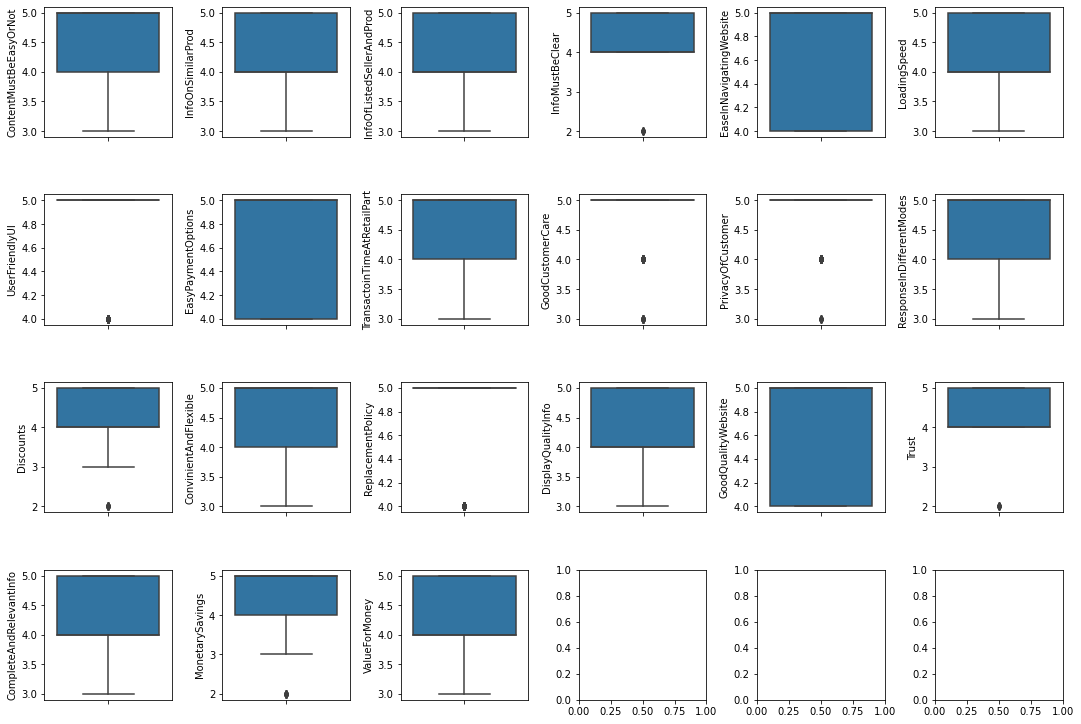

In [238]:
fig,ax=plt.subplots(ncols=6,nrows=4,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in aod.items():
        sn.boxplot(y=col,data=aod,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Skewness Removal

In [239]:
aod.skew()

ContentMustBeEasyOrNot        -1.409057
InfoOnSimilarProd             -0.631992
InfoOfListedSellerAndProd     -0.372300
InfoMustBeClear               -1.290299
EaseInNavigatingWebsite       -0.431100
LoadingSpeed                  -0.368231
UserFriendlyUI                -1.749664
EasyPaymentOptions            -0.819150
TransactoinTimeAtRetailPart   -0.858329
GoodCustomerCare              -2.011127
PrivacyOfCustomer             -2.155190
ResponseInDifferentModes      -1.023034
Discounts                     -1.098273
ConvinientAndFlexible         -0.730655
ReplacementPolicy             -1.404848
DisplayQualityInfo            -0.586509
GoodQualityWebsite            -0.512304
Trust                         -1.326072
CompleteAndRelevantInfo       -0.522575
MonetarySavings               -1.492869
ValueForMoney                 -0.087913
dtype: float64

## ContentMustBeEasyOrNot 

In [240]:
c=boxcox(aod["ContentMustBeEasyOrNot"])[0]
pd.Series(c).skew()

-0.9454000719077066

In [241]:
aod["ContentMustBeEasyOrNot"]=c

## InfoMustBeClear

In [242]:
i=boxcox(aod["InfoMustBeClear"])[0]
pd.Series(i).skew()

-0.15559642938381316

In [243]:
aod["InfoMustBeClear"]=i

## EaseInNavigatingWebsite

In [244]:
e=boxcox(aod["EaseInNavigatingWebsite"])[0]
pd.Series(e).skew()

-0.4310998660968039

In [245]:
aod["EaseInNavigatingWebsite"]=e

## LoadingSpeed

In [246]:
l=boxcox(aod["LoadingSpeed"])[0]
pd.Series(l).skew()

-0.1481296856743154

In [247]:
aod["LoadingSpeed"]=l

## UserFriendlyUI

In [248]:
u=boxcox(aod["UserFriendlyUI"])[0]
pd.Series(u).skew()

-1.7496644291476349

In [249]:
aod["UserFriendlyUI"]=u

## EasyPaymentOptions

In [250]:
e=boxcox(aod["EasyPaymentOptions"])[0]
pd.Series(e).skew()

-0.8191496933726301

In [251]:
aod["EasyPaymentOptions"]=e

## TransactoinTimeAtRetailPart

In [252]:
t=boxcox(aod["TransactoinTimeAtRetailPart"])[0]
pd.Series(t).skew()

-0.47350625716479505

In [253]:
aod["TransactoinTimeAtRetailPart"]=t

## GoodCustomerCare

In [254]:
g=boxcox(aod["GoodCustomerCare"])[0]
pd.Series(g).skew()

-1.476825920386188

In [255]:
aod["GoodCustomerCare"]=g

## PrivacyOfCustomer

In [256]:
p=boxcox(aod["PrivacyOfCustomer"])[0]
pd.Series(p).skew()

-1.5860377039794542

In [257]:
aod["PrivacyOfCustomer"]=p

## ResponseInDifferentModes

In [258]:
r=boxcox(aod["ResponseInDifferentModes"])[0]
pd.Series(r).skew()

-0.5275835698991829

In [259]:
aod["ResponseInDifferentModes"]=r

## ConvinientAndFlexible

In [260]:
c=boxcox(aod["ConvinientAndFlexible"])[0]
pd.Series(c).skew()

-0.325794018714214

In [261]:
aod["ConvinientAndFlexible"]=c

## ReplacementPolicy

In [262]:
r=boxcox(aod["ReplacementPolicy"])[0]
pd.Series(r).skew()

-1.4048480613240917

In [263]:
aod["ReplacementPolicy"]=r

## GoodQualityWebsite

In [264]:
g=boxcox(aod["GoodQualityWebsite"])[0]
pd.Series(g).skew()

-0.5123036784003419

In [265]:
aod["GoodQualityWebsite"]=g

## Trust

In [269]:
t=boxcox(aod["Trust"])[0]
pd.Series(t).skew()

-0.180844608543964

In [270]:
aod["Trust"]=t

## CompleteAndRelevantInfo

In [271]:
c=boxcox(aod["CompleteAndRelevantInfo"])[0]
pd.Series(c).skew()

-0.19806334791054953

In [272]:
aod["CompleteAndRelevantInfo"]=c

## MonetarySavings

In [273]:
m=boxcox(aod["MonetarySavings"])[0]
pd.Series(m).skew()

-0.6273628283345073

In [274]:
aod["MonetarySavings"]=m

In [275]:
aod.head()

,ContentMustBeEasyOrNot,InfoOnSimilarProd,InfoOfListedSellerAndProd,InfoMustBeClear,EaseInNavigatingWebsite,LoadingSpeed,UserFriendlyUI,EasyPaymentOptions,TransactoinTimeAtRetailPart,GoodCustomerCare,PrivacyOfCustomer,ResponseInDifferentModes,Discounts,ConvinientAndFlexible,ReplacementPolicy,DisplayQualityInfo,GoodQualityWebsite,Trust,CompleteAndRelevantInfo,MonetarySavings,ValueForMoney,NetBenifitOfOnlineShoping
1,2.780089e+06,5,5,42.564812,1902.933838,19.799694,2.792341e+16,5.393658e+06,1595.286365,2.861150e+08,1.117426e+11,1402.146380,5,87.604784,3.604710e+12,5,9426.752822,48.941038,37.035207,310.597935,5,1516.927348
2,2.780089e+06,4,4,21.520498,523.565487,11.375823,2.792341e+16,5.393658e+06,1595.286365,2.861150e+08,1.117426e+11,1402.146380,5,87.604784,3.604710e+12,5,9426.752822,24.178193,37.035207,310.597935,4,1516.927348
3,2.558211e+05,4,3,21.520498,1902.933838,11.375823,2.792341e+16,5.393658e+06,451.106139,2.861150e+08,1.117426e+11,404.533661,4,13.892012,4.325719e+10,3,2028.303580,24.178193,19.162938,310.597935,4,85.588984
4,2.780089e+06,3,3,21.520498,523.565487,19.799694,2.792341e+16,5.393658e+06,451.106139,2.861150e+08,2.206849e+09,1402.146380,5,87.604784,3.604710e+12,4,9426.752822,48.941038,19.162938,310.597935,5,1516.927348
5,2.780089e+06,5,5,42.564812,1902.933838,19.799694,2.792341e+16,5.393658e+06,1595.286365,2.861150e+08,1.117426e+11,1402.146380,5,87.604784,3.604710e+12,5,9426.752822,48.941038,37.035207,310.597935,5,1516.927348


# 3:Which Shoping Websites Dataframe

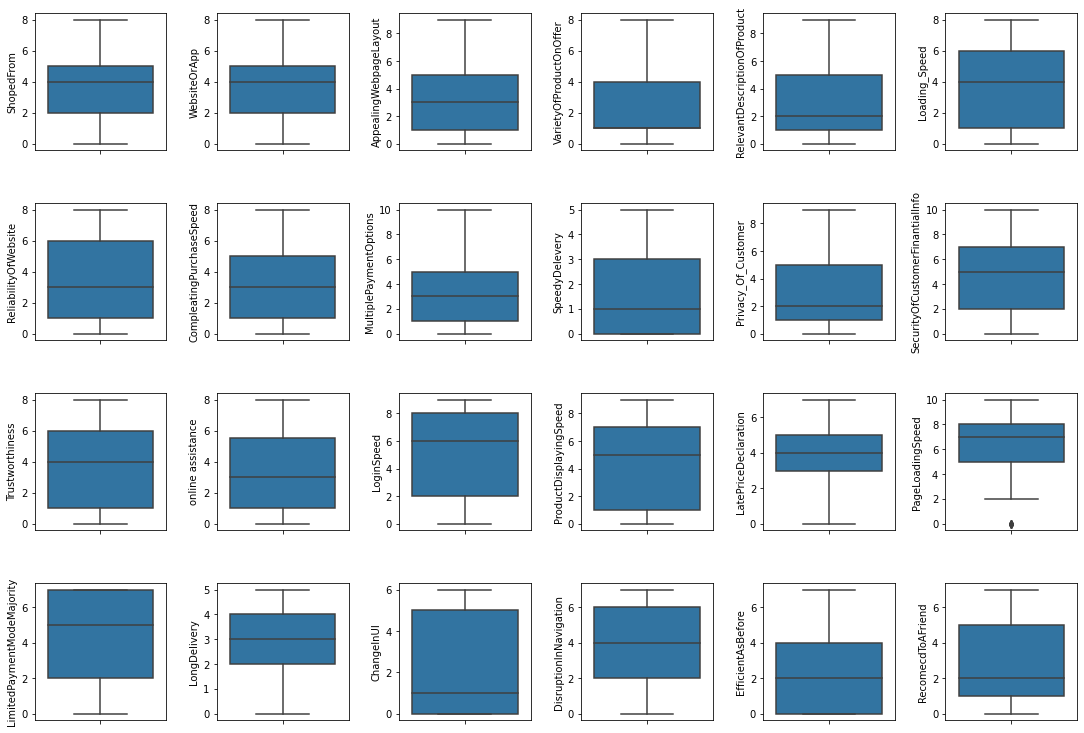

In [276]:
fig,ax=plt.subplots(ncols=6,nrows=4,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in wsw.items():
        sn.boxplot(y=col,data=wsw,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

There are no outliers

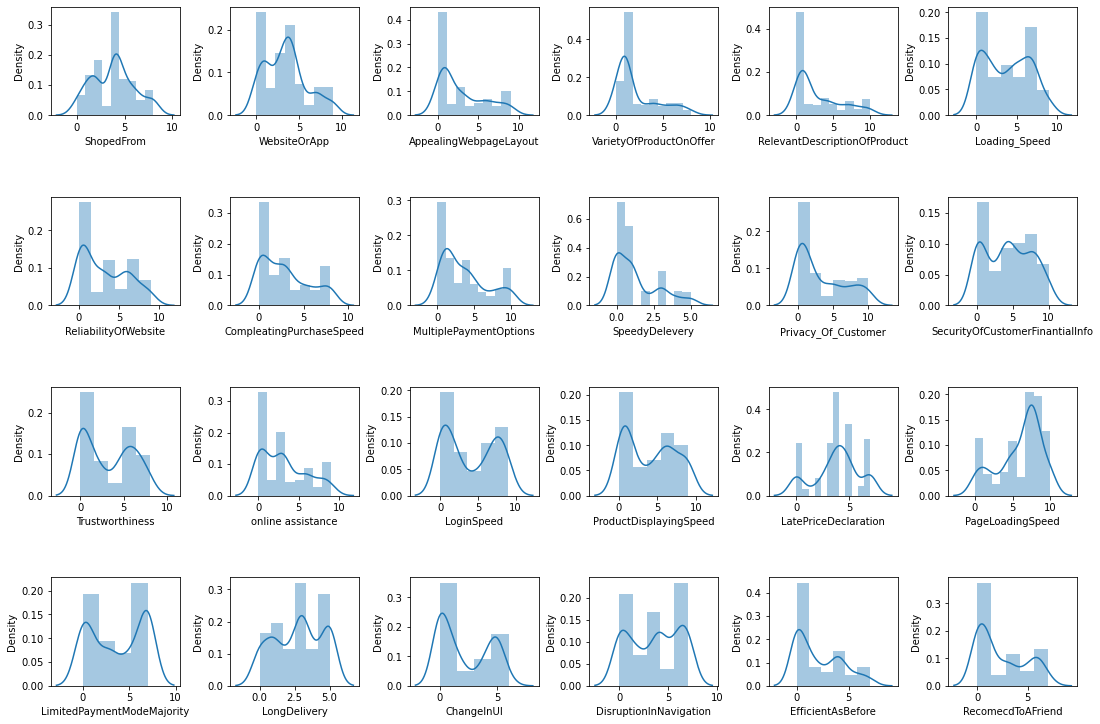

In [148]:
fig,ax=plt.subplots(ncols=6,nrows=4,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in wsw.items():
        sn.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:>

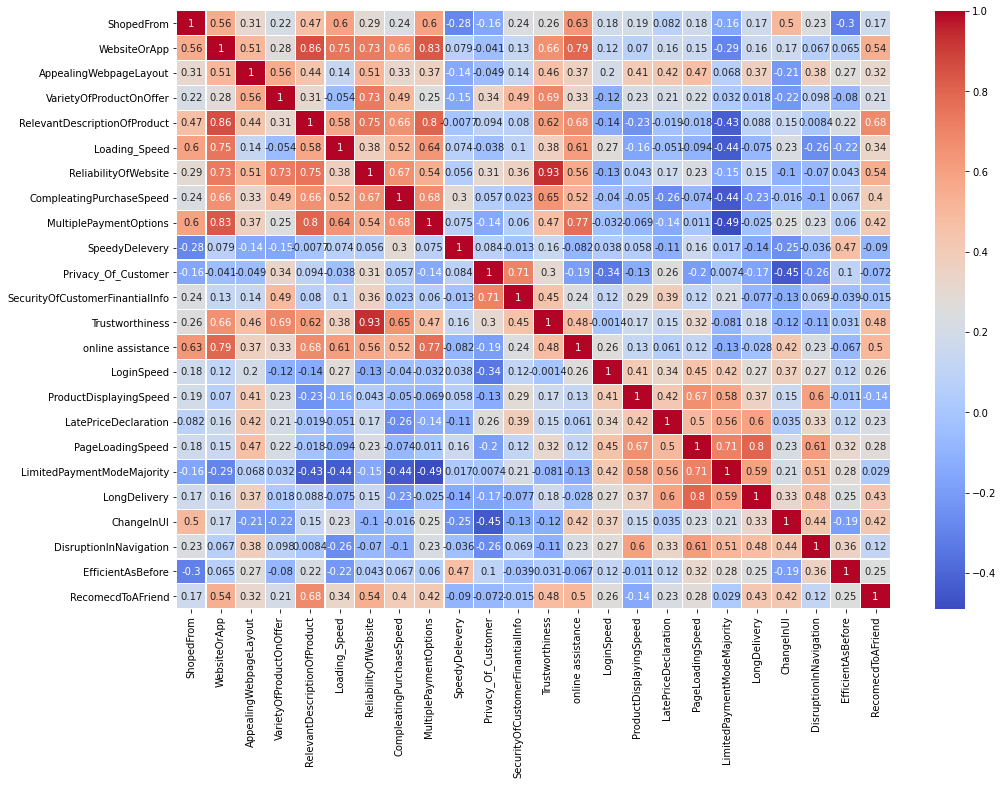

In [39]:
plt.figure(figsize=(16,11))
sn.heatmap(wsw.corr(),linewidths=.1,cmap="coolwarm", annot=True)

WebsiteOrApp,AppealingWebpageLayout,VarietyOfProductOnOffer,RelevantDescriptionOfProduct,Loading_Speed,ReliabilityOfWebsite,CompleatingPurchaseSpeed,MultiplePaymentOptions,Trustworthiness,online assistance,LoginSpeed,LatePriceDeclaration,PageLoadingSpeed,LongDelivery,ChangeInUI,EfficientAsBefore all these are highly or somewhat related to the target variable so we keep these and drop the other columns                                       

In [277]:
wsw=wsw.drop(columns={"ShopedFrom","SpeedyDelevery","Privacy_Of_Customer","SecurityOfCustomerFinantialInfo","ProductDisplayingSpeed","LimitedPaymentModeMajority","DisruptionInNavigation"},axis=1)

In [278]:
wsw.head()

,WebsiteOrApp,AppealingWebpageLayout,VarietyOfProductOnOffer,RelevantDescriptionOfProduct,Loading_Speed,ReliabilityOfWebsite,CompleatingPurchaseSpeed,MultiplePaymentOptions,Trustworthiness,online assistance,LoginSpeed,LatePriceDeclaration,PageLoadingSpeed,LongDelivery,ChangeInUI,EfficientAsBefore,RecomecdToAFriend
1,3,5,6,2,2,8,2,2,8,2,1,7,10,5,0,1,3
2,7,6,4,7,7,6,5,10,6,8,7,4,7,3,5,0,5
3,4,3,1,1,6,3,3,2,5,3,9,4,8,3,1,2,1
4,4,9,7,5,0,6,4,4,6,5,5,5,8,3,0,6,3
5,4,1,3,4,7,4,8,4,4,4,6,2,2,1,5,0,4


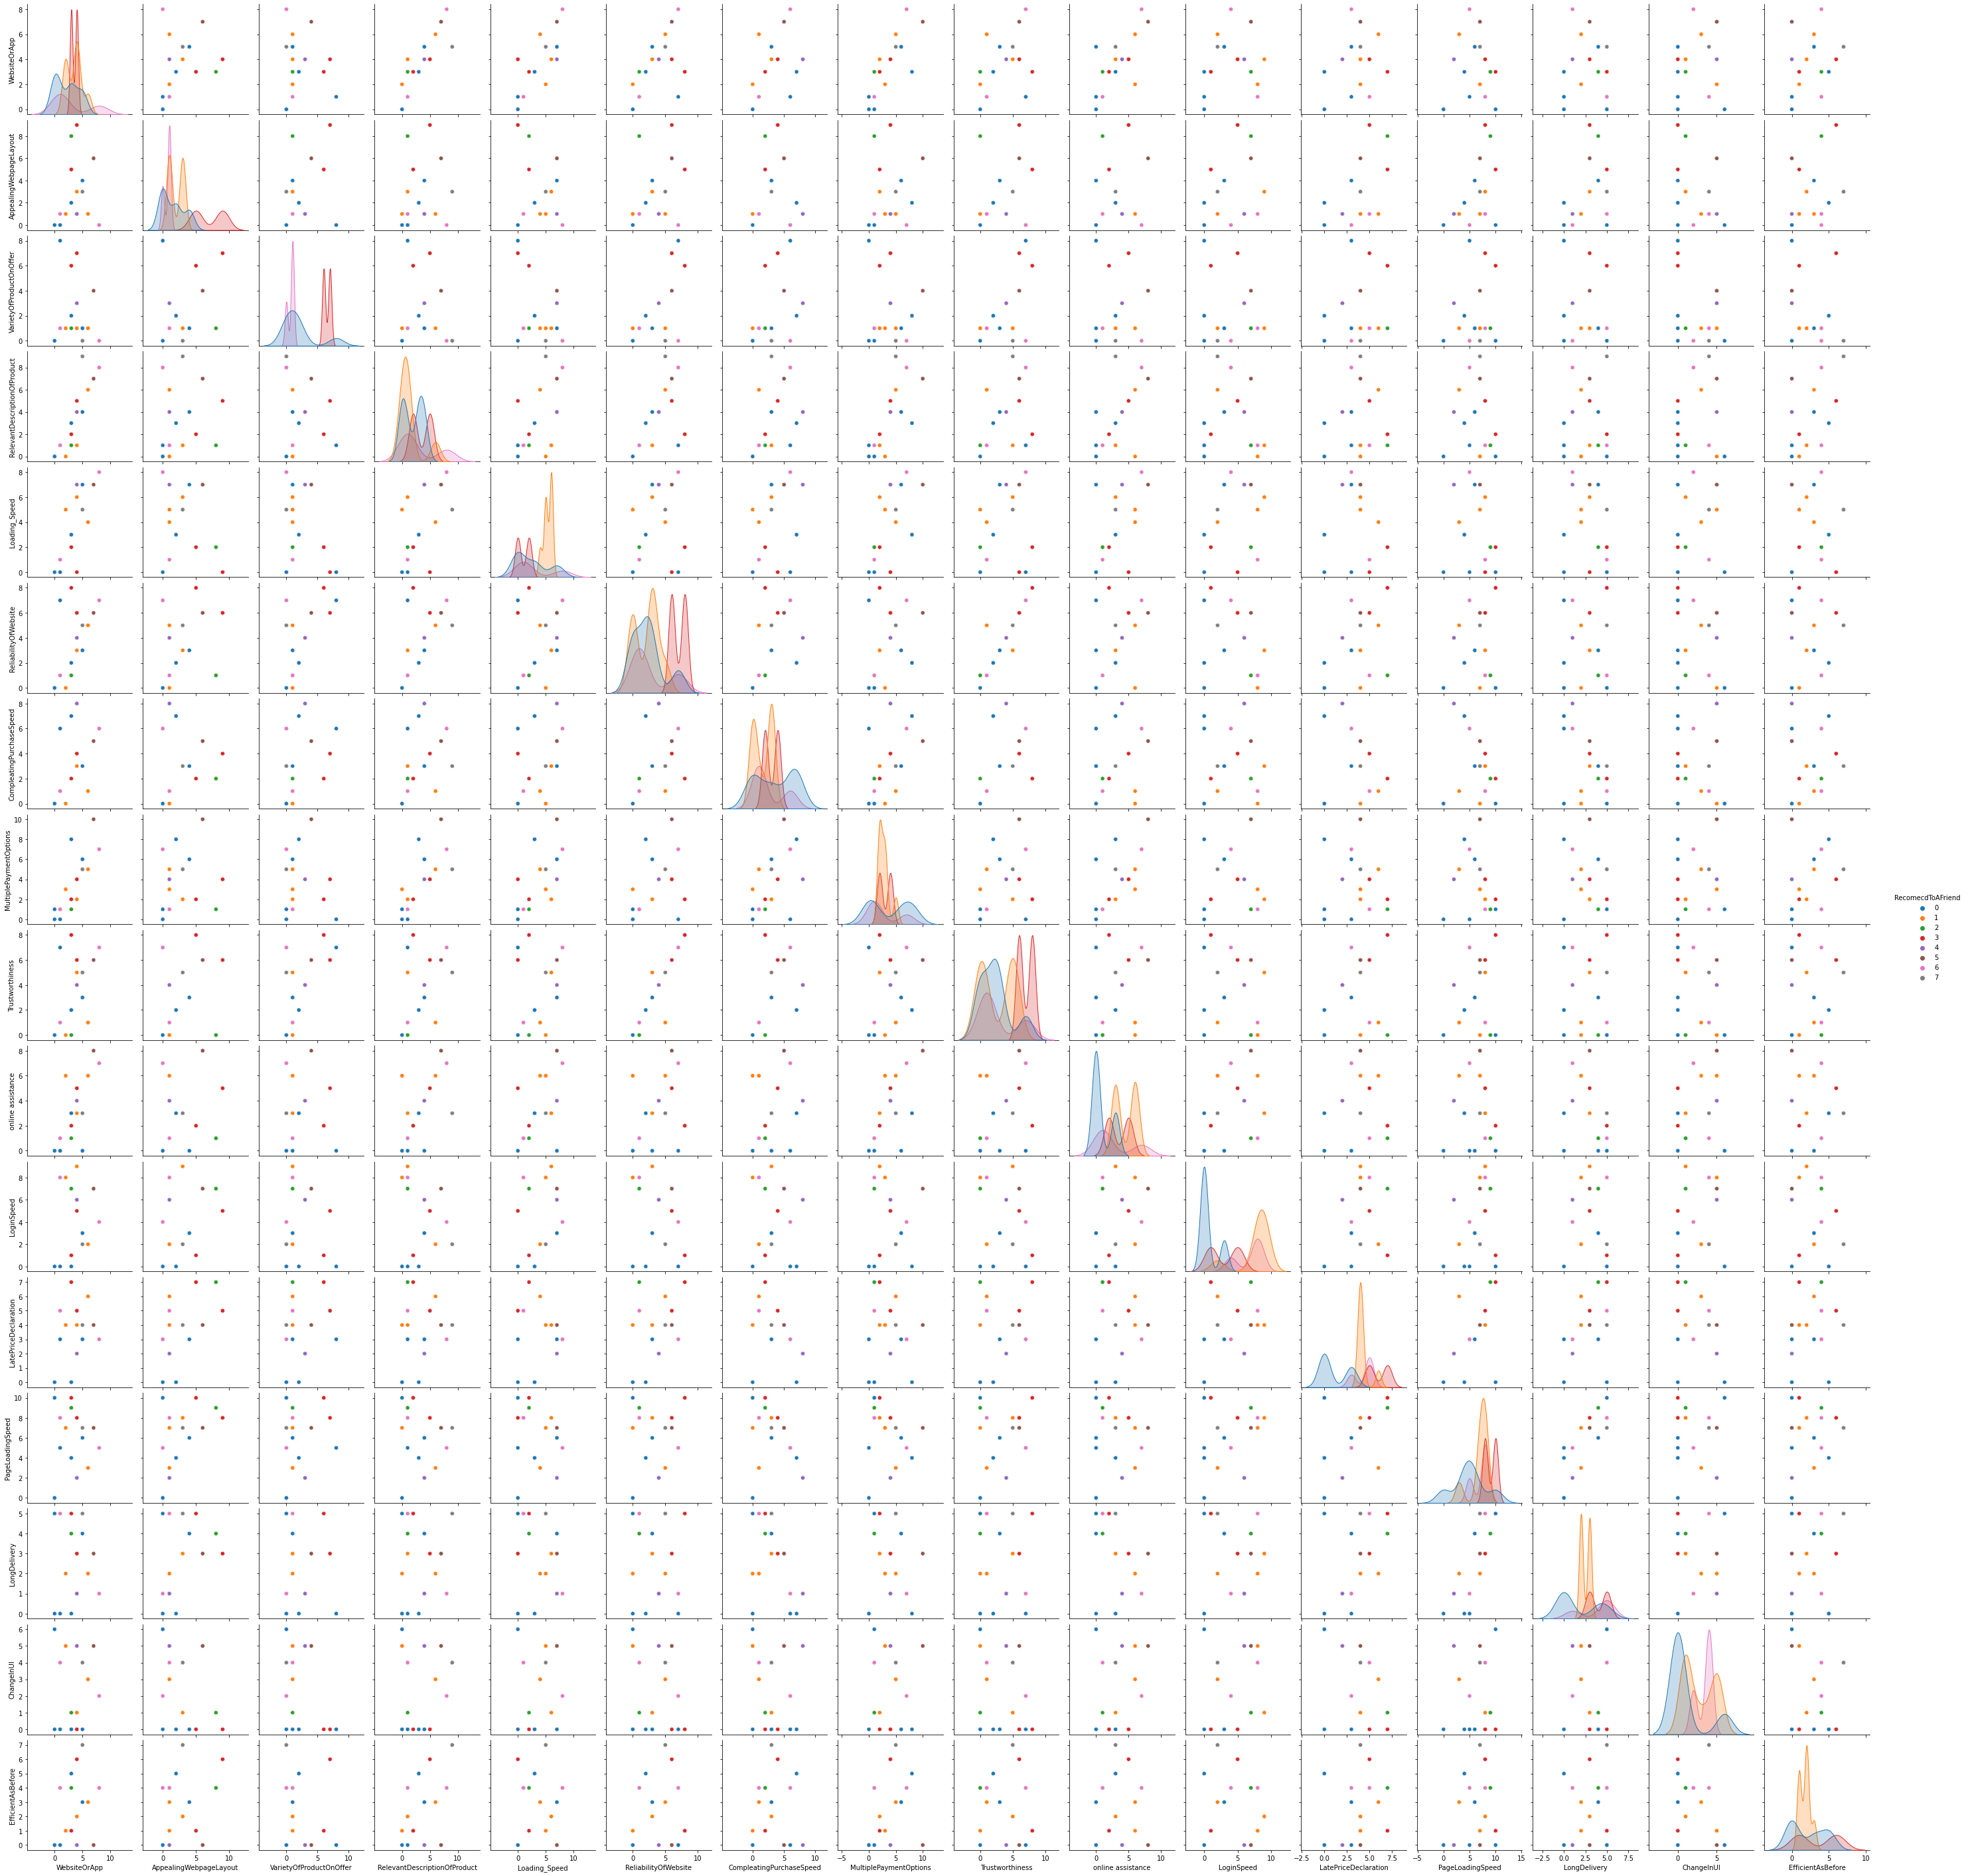

In [279]:
sn.pairplot(wsw,hue="RecomecdToAFriend",palette='tab10')

# Skewness

In [280]:
wsw.skew()

WebsiteOrApp                    0.244741
AppealingWebpageLayout          0.740334
VarietyOfProductOnOffer         1.129032
RelevantDescriptionOfProduct    0.721131
Loading_Speed                  -0.100379
ReliabilityOfWebsite            0.175964
CompleatingPurchaseSpeed        0.461844
MultiplePaymentOptions          0.784014
Trustworthiness                 0.011052
online assistance               0.388485
LoginSpeed                     -0.305168
LatePriceDeclaration           -0.409387
PageLoadingSpeed               -0.961962
LongDelivery                   -0.328261
ChangeInUI                      0.223026
EfficientAsBefore               0.421091
RecomecdToAFriend               0.469446
dtype: float64

## AppealingWebpageLayout

In [281]:
a=np.sqrt(wsw["AppealingWebpageLayout"])
a.skew()

-0.15725171883816802

In [282]:
wsw["AppealingWebpageLayout"]=a

## VarietyOfProductOnOffer

In [283]:
v=np.log(wsw["AppealingWebpageLayout"]+2)
v.skew()

-0.6382195379883294

In [284]:
wsw["AppealingWebpageLayout"]=v

## RelevantDescriptionOfProduct

In [285]:
r=np.sqrt(wsw["RelevantDescriptionOfProduct"])
r.skew()

-0.0942620790305278

In [286]:
wsw["RelevantDescriptionOfProduct"]=r

## MultiplePaymentOptions  

In [287]:
m=np.sqrt(wsw["MultiplePaymentOptions"])
m.skew()

-0.1535640815222719

In [288]:
wsw["RelevantDescriptionOfProduct"]=m

# Now Addind all the dtaframe together to make the whole dataframe

In [289]:
frames = [pdf, aod, wsw]

df = pd.concat(frames,axis=1)

In [291]:
df.head()

,Gender,Age,City,PinCode,TimeOfOnlineShoping,PurchaseInAYear,TypeOfInternet,Device,ScreenSize,OS,Browser,Channel,AccessType,TimeBeforeBuying,PaymentOption,AbandonShopingcart,ReasonForAbandonCart,RecomecdToAFriend,ContentMustBeEasyOrNot,InfoOnSimilarProd,InfoOfListedSellerAndProd,InfoMustBeClear,EaseInNavigatingWebsite,LoadingSpeed,UserFriendlyUI,EasyPaymentOptions,TransactoinTimeAtRetailPart,GoodCustomerCare,PrivacyOfCustomer,ResponseInDifferentModes,Discounts,ConvinientAndFlexible,ReplacementPolicy,DisplayQualityInfo,GoodQualityWebsite,Trust,CompleteAndRelevantInfo,MonetarySavings,ValueForMoney,NetBenifitOfOnlineShoping,WebsiteOrApp,AppealingWebpageLayout,VarietyOfProductOnOffer,RelevantDescriptionOfProduct,Loading_Speed,ReliabilityOfWebsite,CompleatingPurchaseSpeed,MultiplePaymentOptions,Trustworthiness,online assistance,LoginSpeed,LatePriceDeclaration,PageLoadingSpeed,LongDelivery,ChangeInUI,EfficientAsBefore,RecomecdToAFriend
1,1,2,2,110030,5,5,2,1,2,3,1,1,4,5,1,5,5,3,2.780089e+06,5,5,42.564812,1902.933838,19.799694,2.792341e+16,5.393658e+06,1595.286365,2.861150e+08,1.117426e+11,1402.146380,5,87.604784,3.604710e+12,5,9426.752822,48.941038,37.035207,310.597935,5,1516.927348,3,1.443635,6,1.414214,2,8,2,2,8,2,1,7,10,5,0,1,3
2,1,2,4,201308,4,5,3,1,4,2,1,1,4,4,4,3,5,5,2.780089e+06,4,4,21.520498,523.565487,11.375823,2.792341e+16,5.393658e+06,1595.286365,2.861150e+08,1.117426e+11,1402.146380,5,87.604784,3.604710e+12,5,9426.752822,24.178193,37.035207,310.597935,4,1516.927348,7,1.492789,4,3.162278,7,6,5,10,6,8,7,4,7,3,5,0,5
3,0,2,6,132001,4,1,3,1,4,3,2,1,1,3,1,1,2,1,2.558211e+05,4,3,21.520498,1902.933838,11.375823,2.792341e+16,5.393658e+06,451.106139,2.861150e+08,1.117426e+11,404.533661,4,13.892012,4.325719e+10,3,2028.303580,24.178193,19.162938,310.597935,4,85.588984,4,1.316958,1,1.414214,6,3,3,2,5,3,9,4,8,3,1,2,1
4,1,2,0,530068,3,2,2,1,2,3,2,3,4,5,1,4,2,3,2.780089e+06,3,3,21.520498,523.565487,19.799694,2.792341e+16,5.393658e+06,451.106139,2.861150e+08,2.206849e+09,1402.146380,5,87.604784,3.604710e+12,4,9426.752822,48.941038,19.162938,310.597935,5,1516.927348,4,1.609438,7,2.000000,0,6,4,4,6,5,5,5,8,3,0,6,3
5,1,3,9,201308,5,5,2,1,4,2,1,1,4,5,4,4,2,4,2.780089e+06,5,5,42.564812,1902.933838,19.799694,2.792341e+16,5.393658e+06,1595.286365,2.861150e+08,1.117426e+11,1402.146380,5,87.604784,3.604710e+12,5,9426.752822,48.941038,37.035207,310.597935,5,1516.927348,4,1.098612,3,2.000000,7,4,8,4,4,4,6,2,2,1,5,0,4
